In [1]:
from math import pi
import IPython.display

from scripts.vectors import *
from scripts.transformations import *
from scripts.transformation_test_utils import *
import scripts.display3d as d3
import scripts.load_off as ld
import scripts.draw2d as d2

ModuleNotFoundError: No module named 'vectors'

In [ ]:
def display_inline(image):
    IPython.display.display(image)

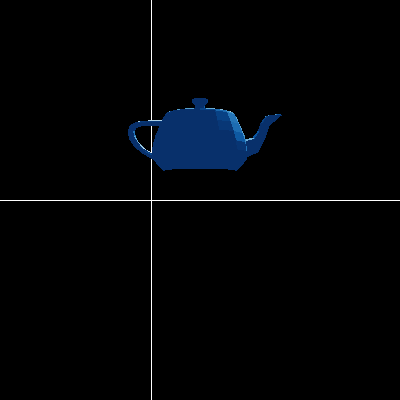

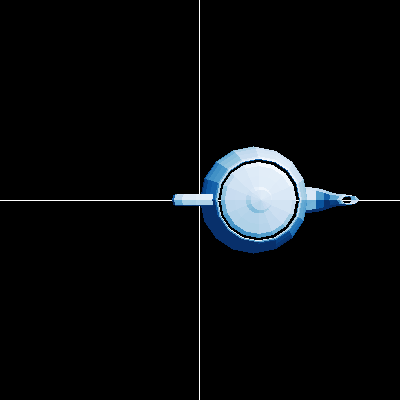

In [ ]:
teapot_vertices, teapot_faces = ld.load_off_file('scripts/ch04/teapot.off')
light = (1, 2, 3)
teapot_model = ld.create_3d_model(teapot_vertices, teapot_faces)

display_properties = d3.DisplayProperties(
    scene=d3.Scene(
        translate=(-0.5, 0.0, -5.0),
        rotate=d3.Rotation(
            initial=-90.0,
            axis=(1.0, 0.0, 0.0)
        )
    )
)

image = d3.render_frame(teapot_model, light, display_properties)
IPython.display.display(image)
image = d3.render_frame(teapot_model, light)
display_inline(image)

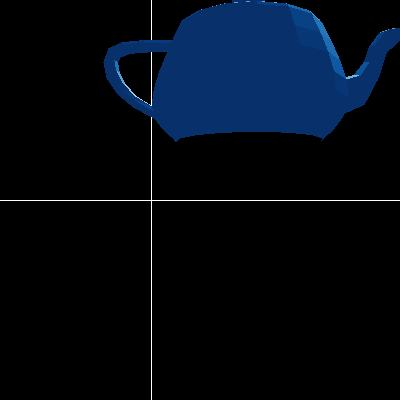

In [ ]:
teapot_model_x2 = map_to_polygons(scale_by(2.0), teapot_model)

image = d3.render_frame(teapot_model_x2, light, display_properties)
display_inline(image)

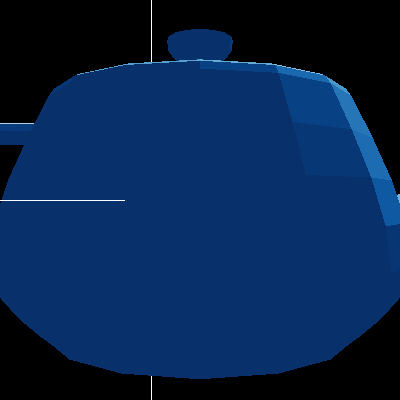

In [ ]:
teapot_model_4x_moved = map_to_polygons(compose(scale_by(4.0), translate_by((-1.5, 0, -2.5))), teapot_model)

image = d3.render_frame(teapot_model_4x_moved, light, display_properties)
display_inline(image)

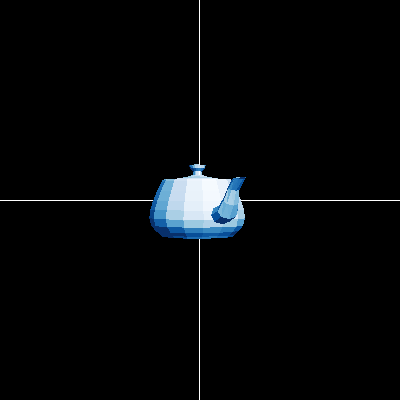

In [ ]:
def center(vertices):
    #https://docs.python.org/3.4/faq/programming.html#why-do-lambdas-defined-in-a-loop-with-different-values-all-return-the-same-result
    keys = [(lambda vertex, index=i : vertex[index]) for i in range(3)]
    
    min_xyz = (
        min(vertices, key=keys[0])[0],
        min(vertices, key=keys[1])[1],
        min(vertices, key=keys[2])[2]
    )
    max_xyz = (
        max(vertices, key=keys[0])[0],
        max(vertices, key=keys[1])[1],
        max(vertices, key=keys[2])[2]
    )

    return scale(0.5, add(min_xyz, max_xyz))


teapot_model_rotated = map_to_polygons(
    compose(
        translate_by(scale(-1.0, center(teapot_vertices))),
        rotate_z_by(-pi / 3),
        rotate_x_by(-pi / 2)
    ),
    teapot_model
)

image = d3.render_frame(teapot_model_rotated, light)
display_inline(image)

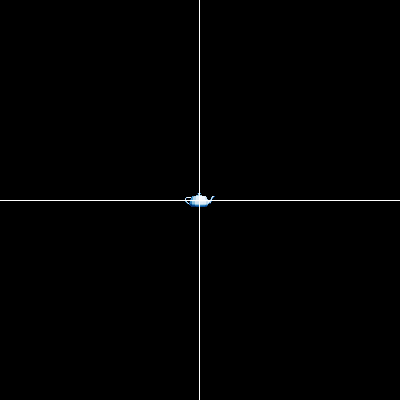

In [ ]:
teapot_model_away = map_to_polygons(
    compose(
        translate_by(scale(-1.0, center(teapot_vertices))),
        rotate_x_by(-pi / 2),
        translate_by((0, 0, -20))
    ),
    teapot_model
)

image = d3.render_frame(teapot_model_away, light)
display_inline(image)

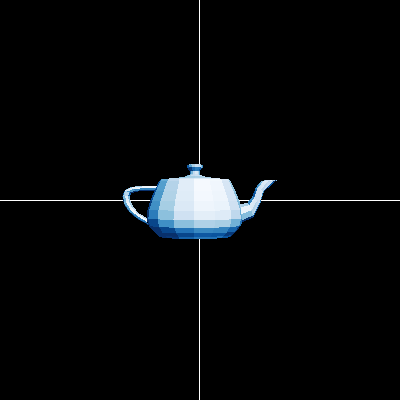

In [ ]:
proper_teapot = map_to_polygons(
    compose(
        translate_by(scale(-1.0, center(teapot_vertices))),
        rotate_x_by(-pi / 2)
    ),
    teapot_model
)

image = d3.render_frame(proper_teapot, light)
display_inline(image)

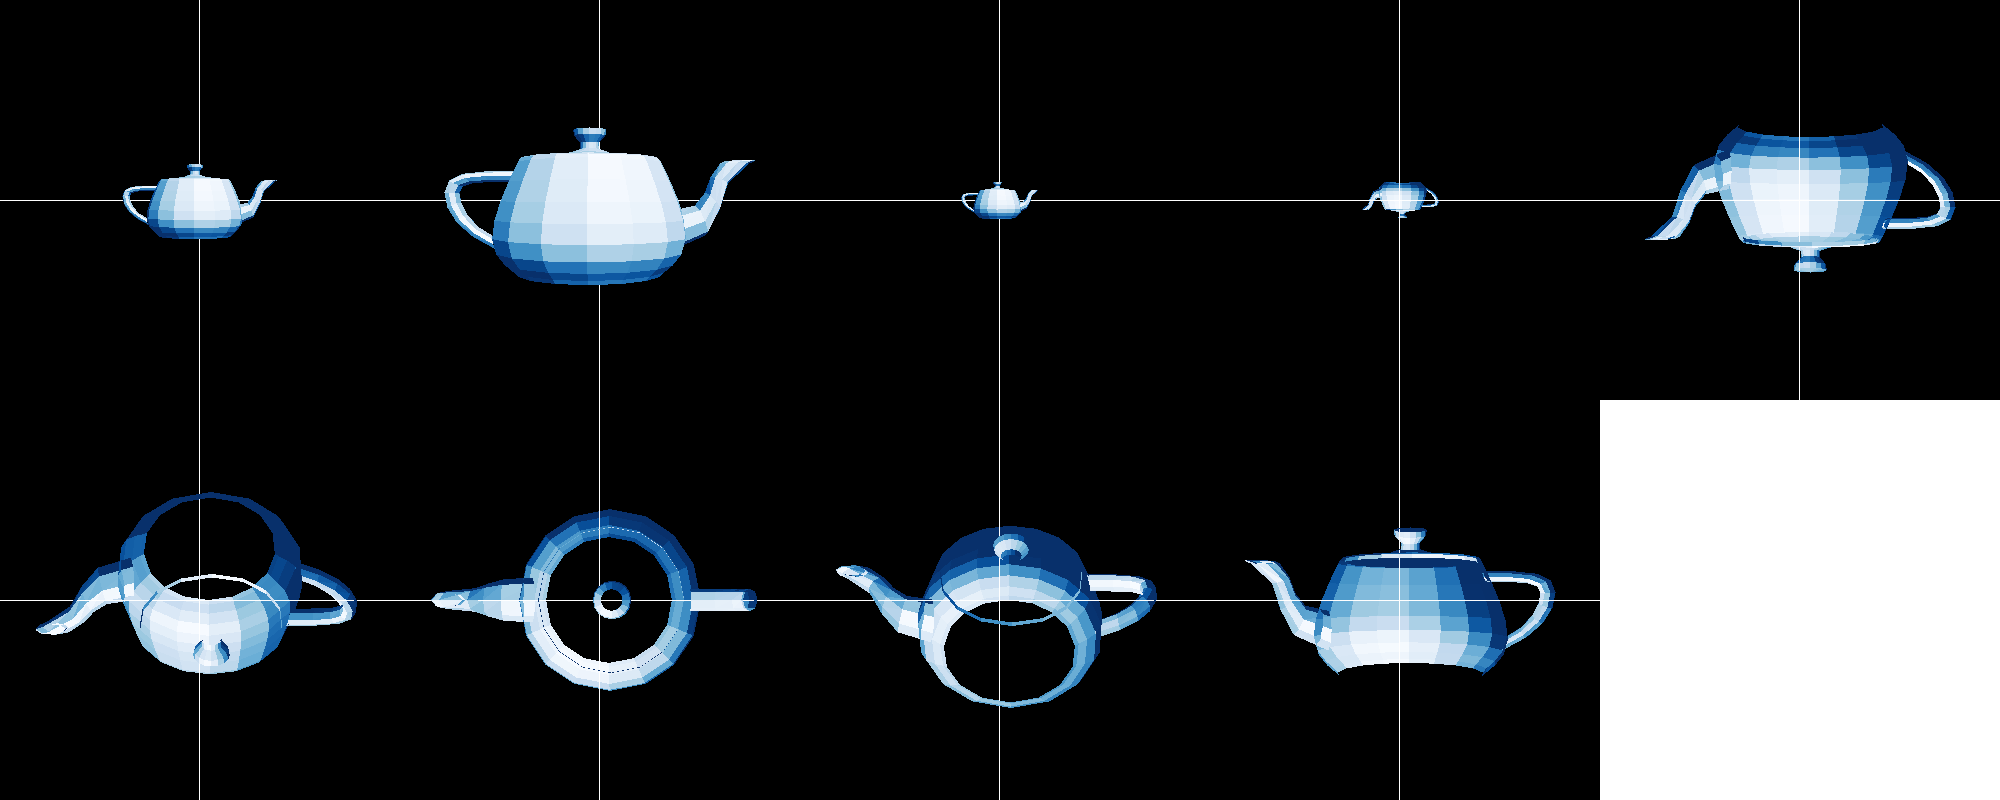

In [ ]:
display_inline(
    d3.render_sequence(
        proper_teapot,
        light,
        [scale_by(2), scale_by(0.25), scale_by(-1), scale_by(4),
         rotate_x_by(-pi / 4), rotate_x_by(-pi / 4), rotate_x_by(-pi / 4), rotate_x_by(-pi / 4)],
    )
)

In [ ]:
# linear transformation can be defined over the standard basis
A = (
    (1, 1, 1), # A(e1)
    (1, 0, -1), # A(e2)
    (0, 1, 1) # A(e3)
)

def linear_transform(transformation, vector):
    return add(
        scale(vector[0], transformation[0]),
        scale(vector[1], transformation[1]),
        scale(vector[2], transformation[2])
    )

print(linear_transform(A, (-1, 2, 2)))

(1, 1, -1)


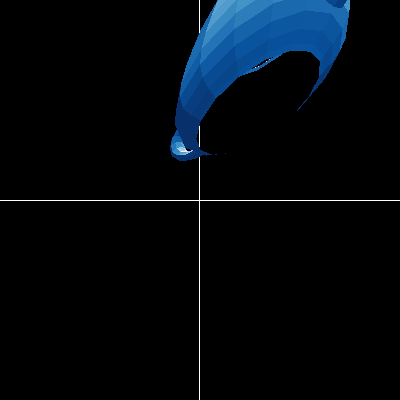

In [ ]:
def linear_transform_by(transformation):
    return lambda vector: linear_transform(transformation, vector)

display_inline(
    d3.render_frame(
        map_to_polygons(linear_transform_by(A), teapot_model),
        light
    )
)

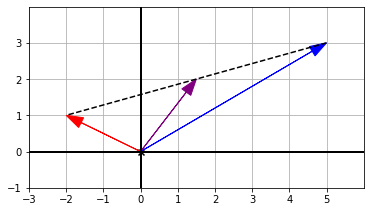

In [ ]:
v1, v2 = (5, 3), (-2, 1)
midpoint = scale(0.5, add(v1, v2))

d2.draw2d(
    d2.Arrow2D(v1, color="blue"),
    d2.Arrow2D(v2, color="red"),
    d2.Arrow2D(midpoint, color="purple"),
    d2.Segment2D(v1, v2, color="black", linestyle="dashed")
)

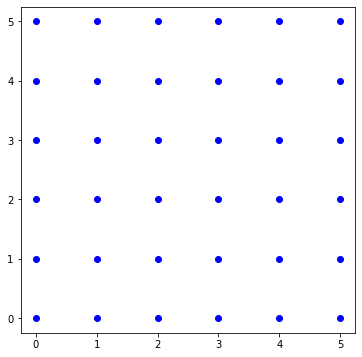

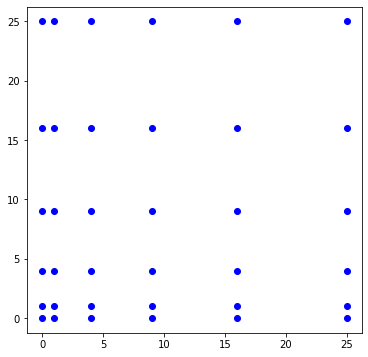

In [ ]:
def square_components(vector):
    return tuple([c**2 for c in vector])

test_vectors = [(i, j) for i in range(0, 6) for j in range(0, 6)]

d2.draw2d(
    d2.Points2D(*test_vectors, color='blue'),
    origin=False,
    axes=False,
    grid=False
)

d2.draw2d(
    d2.Points2D(*[square_components(v) for v in test_vectors], color='blue'),
    origin=False,
    axes=False,
    grid=False
)

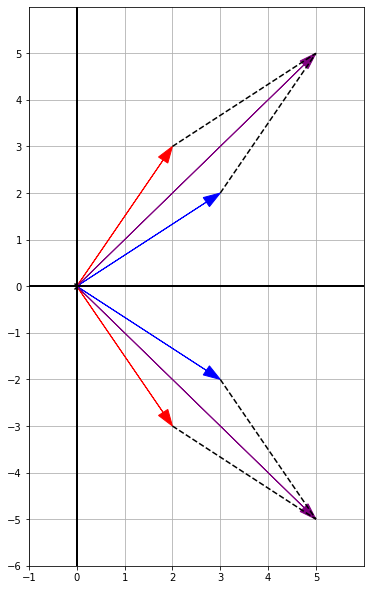

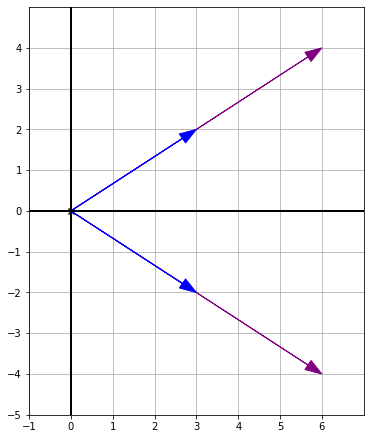

In [ ]:
def mirror_x(vector):
    return (vector[0], -vector[1]) + vector[2:]

u, v = (3, 2), (2, 3)
sum_uv = add(u, v)

m_u, m_v = mirror_x(u), mirror_x(v)
sum_m_uv = add(m_u, m_v)

assert epsilon_equal(sum_m_uv, mirror_x(sum_uv), 1e-6)

d2.draw2d(
    d2.Arrow2D(u, color="blue"),
    d2.Arrow2D(v, color="red"),
    d2.Arrow2D(sum_uv, color="purple"),
    d2.Segment2D(u, sum_uv, color="black", linestyle="dashed"),
    d2.Segment2D(v, sum_uv, color="black", linestyle="dashed"),
    d2.Arrow2D(m_u, color="blue"),
    d2.Arrow2D(m_v, color="red"),
    d2.Arrow2D(sum_m_uv, color="purple"),
    d2.Segment2D(m_u, sum_m_uv, color="black", linestyle="dashed"),
    d2.Segment2D(m_v, sum_m_uv, color="black", linestyle="dashed")
)

s_u = scale(2, u)
s_m_u = scale(2, m_u)

assert epsilon_equal(s_m_u, mirror_x(s_u), 1e-6)

d2.draw2d(
    d2.Arrow2D(s_u, color="purple"),
    d2.Arrow2D(u, color="blue"),
    d2.Arrow2D(s_m_u, color="purple"),
    d2.Arrow2D(m_u, color="blue"),
)

In [ ]:
def linear_combination(scalars, *vectors):
    assert len(scalars) == len(vectors), "{} != {}".format(len(scalars), len(vectors))
    
    scaled = [scale(s, v) for s, v in zip(scalars, vectors)]
    return add(*scaled)
    
linear_combination([1, 2, 3], (1, 0, 0), (0, 1, 0), (0, 0, 1))


(1, 2, 3)

In [ ]:
def transform_standard_basis(transform):
    standard_basis = ((1, 0, 0), (0, 1, 0), (0, 0, 1))
    
    return tuple(map(transform, standard_basis))

transform_standard_basis(rotate_z_by(pi / 2))

((6.123233995736766e-17, 1.0, 0), (-1.0, 1.2246467991473532e-16, 0), (0, 0, 1))

In [ ]:
alpha = (
    (1, 1, 1),
    (1, 0, -1),
    (0, 1, 1)
)

beta = (
    (0, 0, 1),
    (2, 1, 0),
    (-1, 0, -1)
)

def transform_by(linear_transform_over_standard_basis):
    return lambda vector: linear_transform(linear_transform_over_standard_basis, vector)

t_alpha = transform_by(alpha)
t_beta = transform_by(beta)

composition = compose(t_beta, t_alpha)

print(composition((1, 0, 0)))
print(composition((0, 1, 0)))
print(composition((0, 0, 1)))

(0, 1, 1)
(3, 2, 1)
(-1, -2, -2)
